In [ ]:
from google.colab.patches import cv2_imshow
from skimage import io
import os


import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import random
import seaborn as sns
from tqdm.notebook import tqdm
from PIL import Image


import tensorflow as tf
from keras_preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input

In [ ]:
from zipfile import ZipFile
filename = "Balanced.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
!pip install -q keras

In [ ]:
len(os.listdir('Balanced'))

800

In [ ]:
f_list = os.listdir('Balanced')


f_num = len(f_list)
print('Number of images:', f_num)
print(f_list[0])

Number of images: 800
24_1_3_20170104234737428.jpg.chip.jpg


In [ ]:
df = pd.DataFrame(f_list, columns = ['train_name'])

df['train_gender'] = df.apply(lambda x : x['train_name'].split('_')[1], axis = 1).astype('int')

df['train_demographical_area'] = df.apply(lambda x : x['train_name'].split('_')[2], axis = 1).astype('int')
df.head()

,train_name,train_gender,train_demographical_area
0,24_1_3_20170104234737428.jpg.chip.jpg,1,3
1,30_1_0_20170109012829305.jpg.chip.jpg,1,0
2,28_0_2_20170116162829960.jpg.chip.jpg,0,2
3,29_0_3_20170119153035762.jpg.chip.jpg,0,3
4,30_0_2_20170103235423316.jpg.chip.jpg,0,2


In [ ]:
gender_dict = {0:"Male", 1:"Female"}

In [ ]:
clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize=(8,8))



def extract_Clahe_features(images):
    Clahe_features = []
    for image in tqdm(images):
        image = "Balanced/"+image
        img = load_img(image)
        img = img.resize((224, 224), )
        img = np.array(img)
        Clahe_features.append(img)

    Clahe_features = np.array(Clahe_features)

    return Clahe_features


In [ ]:
X_Clahe = extract_Clahe_features(df['train_name'])

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
y_gender = np.array(df['train_gender'])

print(y_gender)

[1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 0 

In [ ]:
X_Clahe = X_Clahe/255.0

In [ ]:
from zipfile import ZipFile
filename = "all.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
t_list = os.listdir('all')


t_num = len(t_list)
print('Number of images:', t_num)
print(t_list)

Number of images: 104
['31_1_3_20170119155508987.jpg.chip.jpg', '31_1_2_20170104020928085.jpg.chip.jpg', '31_1_1_20170103183224642.jpg.chip.jpg', '31_1_1_20170112210531485.jpg.chip.jpg', '31_1_3_20170119200201348.jpg.chip.jpg', '31_1_0_20170103182528433.jpg.chip.jpg', '31_0_3_20170104231444482.jpg.chip.jpg', '31_1_3_20170104235836460.jpg.chip.jpg', '31_0_3_20170104220255896.jpg.chip.jpg', '31_1_2_20170116191331056.jpg.chip.jpg', '31_1_2_20170109141257277.jpg.chip.jpg', '31_1_1_20170112211518637.jpg.chip.jpg', '31_1_1_20170112213126246.jpg.chip.jpg', '31_1_0_20170103183155451.jpg.chip.jpg', '31_1_0_20170103182536130.jpg.chip.jpg', '31_1_3_20170109140727630.jpg.chip.jpg', '31_0_2_20170116193441821.jpg.chip.jpg', '31_1_0_20170103163117935.jpg.chip.jpg', '31_1_0_20170104235124347.jpg.chip.jpg', '31_1_3_20170117181717125.jpg.chip.jpg', '31_0_2_20170116191346864.jpg.chip.jpg', '31_1_2_20170109003538257.jpg.chip.jpg', '31_0_0_20170104201726242.jpg.chip.jpg', '31_0_2_20170116170946512.jpg.chip

In [ ]:

df_test = pd.DataFrame(t_list, columns = ['test_name'])

df_test['test_gender'] = df_test.apply(lambda x : x['test_name'].split('_')[1], axis = 1).astype('int')

df_test.head()

,test_name,test_gender
0,31_1_3_20170119155508987.jpg.chip.jpg,1
1,31_1_2_20170104020928085.jpg.chip.jpg,1
2,31_1_1_20170103183224642.jpg.chip.jpg,1
3,31_1_1_20170112210531485.jpg.chip.jpg,1
4,31_1_3_20170119200201348.jpg.chip.jpg,1


In [ ]:
test_gender = np.array(df_test['test_gender'])

print(test_gender)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0]


In [ ]:
def test_dataset(images):
    dataset = []
    for image in tqdm(images):
        image = "all/"+image
        img = load_img(image, )
        img = img.resize((224, 224))
        img = np.array(img)
        dataset.append(img)

    dataset = np.array(dataset)

    return dataset

In [ ]:
testset_RGB = test_dataset(df_test['test_name'])

  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
testset_RGB.shape

(104, 224, 224, 3)

In [ ]:
features = testset_RGB.reshape(len(testset_RGB), 224, 224, 3)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16


In [ ]:

vggg = Sequential()

vggg.add(VGG16(weights='imagenet'))
vggg.add(Flatten())
vggg.add(Dense(1, activation='sigmoid'))

vggg.layers[0].trainable = False

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
vggg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 138,358,545
Trainable params: 1,001
Non-trainable params: 138,357,544
_________________________________________________________________


In [ ]:
vggg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_history = vggg.fit(x=X_Clahe, y=y_gender, batch_size=32, epochs=4, validation_split=0.2)

Epoch 1/4
20/20 [==============================] - 420s 21s/step - loss: 0.6931 - accuracy: 0.5109 - val_loss: 0.6936 - val_accuracy: 0.4563
Epoch 2/4
20/20 [==============================] - 432s 22s/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6936 - val_accuracy: 0.4563
Epoch 3/4
20/20 [==============================] - 416s 21s/step - loss: 0.6928 - accuracy: 0.5109 - val_loss: 0.6935 - val_accuracy: 0.4563
Epoch 4/4
20/20 [==============================] - 419s 21s/step - loss: 0.6927 - accuracy: 0.5109 - val_loss: 0.6938 - val_accuracy: 0.4563


In [ ]:
vggg.evaluate(features,  test_gender)

4/4 [==============================] - 65s 13s/step - loss: 0.6934 - accuracy: 0.4519


[0.693389892578125, 0.45192307233810425]

In [ ]:
vggg_pred = vggg.predict(features)

4/4 [==============================] - 59s 14s/step


In [ ]:
rounded_vgg_pred = np.round(vggg_pred)

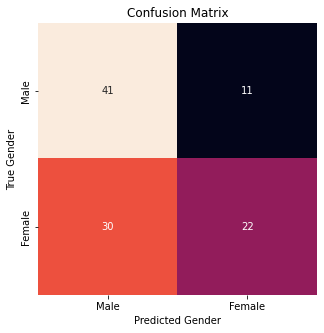

In [ ]:
vgg_matrix = tf.math.confusion_matrix(test_gender,rounded_vgg_pred)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(vgg_matrix, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);

In [ ]:

resnett = Sequential()

resnett.add(ResNet50(weights='imagenet'))
resnett.add(Flatten())
resnett.add(Dense(1, activation='sigmoid'))

resnett.layers[0].trainable = False


102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
resnett.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 25,637,713
Trainable params: 1,001
Non-trainable params: 25,636,712
_________________________________________________________________


In [ ]:
resnett.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_history = resnett.fit(x=X_Clahe, y=y_gender, batch_size=30, epochs=4, validation_split=0.2)

Epoch 1/4
22/22 [==============================] - 136s 6s/step - loss: 0.6934 - accuracy: 0.4891 - val_loss: 0.6928 - val_accuracy: 0.5437
Epoch 2/4
22/22 [==============================] - 127s 6s/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.5750
Epoch 3/4
22/22 [==============================] - 127s 6s/step - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.6932 - val_accuracy: 0.4563
Epoch 4/4
22/22 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5109

In [ ]:
resnett.evaluate(testset_RGB,  test_gender)

4/4 [==============================] - 18s 4s/step - loss: 0.6916 - accuracy: 0.6154


[0.6915665864944458, 0.6153846383094788]

In [ ]:
resnett_pred = resnett.predict(testset_RGB)

4/4 [==============================] - 18s 4s/step


In [ ]:
rounded_resnett_pred = np.round(resnett_pred)

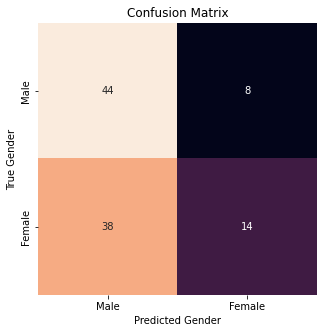

In [ ]:
resnet_matrix = tf.math.confusion_matrix(test_gender,rounded_resnett_pred)
import seaborn as sn

plt.figure(figsize=(5,5))
ax= plt.subplot()
sn.heatmap(resnet_matrix, annot=True, fmt = 'd', ax= ax ,cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted Gender');ax.set_ylabel('True Gender');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Male', 'Female']); ax.yaxis.set_ticklabels(['Male', 'Female']);